In [42]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
# Load the dataset
df = pd.read_csv('premier-league-matches.csv')

In [44]:
# Check the Dataset
print(df.head())

df.isnull().sum()


   Season_End_Year  Wk        Date            Home  HomeGoals  AwayGoals  \
0             1993   1  1992-08-15   Coventry City          2          1   
1             1993   1  1992-08-15    Leeds United          2          1   
2             1993   1  1992-08-15   Sheffield Utd          2          1   
3             1993   1  1992-08-15  Crystal Palace          3          3   
4             1993   1  1992-08-15         Arsenal          2          4   

             Away FTR  
0   Middlesbrough   H  
1       Wimbledon   H  
2  Manchester Utd   H  
3       Blackburn   D  
4    Norwich City   A  


Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64

In [45]:
# General descriptive statistics for numerical columns
df.describe()


,Season_End_Year,Wk,HomeGoals,AwayGoals
count,12026.000000,12026.000000,12026.000000,12026.000000
mean,2007.713620,19.730501,1.524364,1.142525
std,9.072559,11.123916,1.306417,1.133930
min,1993.000000,1.000000,0.000000,0.000000
25%,2000.000000,10.000000,1.000000,0.000000
50%,2008.000000,20.000000,1.000000,1.000000
75%,2016.000000,29.000000,2.000000,2.000000
max,2023.000000,42.000000,9.000000,9.000000


## Top Scoring Seasons Breakdown

In [46]:
# Group data by team and season to calculate total wins
top_teams_season = df.groupby(['Season_End_Year', 'Home'])['HomeGoals'].count().reset_index()
top_teams_season.columns = ['Season_End_Year', 'Home', 'total_wins']

# Filter to show only the top 10 teams
top_teams = top_teams_season.groupby('Home')['total_wins'].sum().sort_values(ascending=False).head(10).index
top_teams_season = top_teams_season[top_teams_season['Home'].isin(top_teams)]


In [30]:
import plotly.express as px
#Plot to show top scoring seasons
fig = px.sunburst(top_scoring_seasons, path=['Season_End_Year'], values='total_goals', color='total_goals',
                  color_continuous_scale='ice')
fig.update_layout(title='Top Scoring Seasons Breakdown')
fig.show()


## Win Distribution of top teams

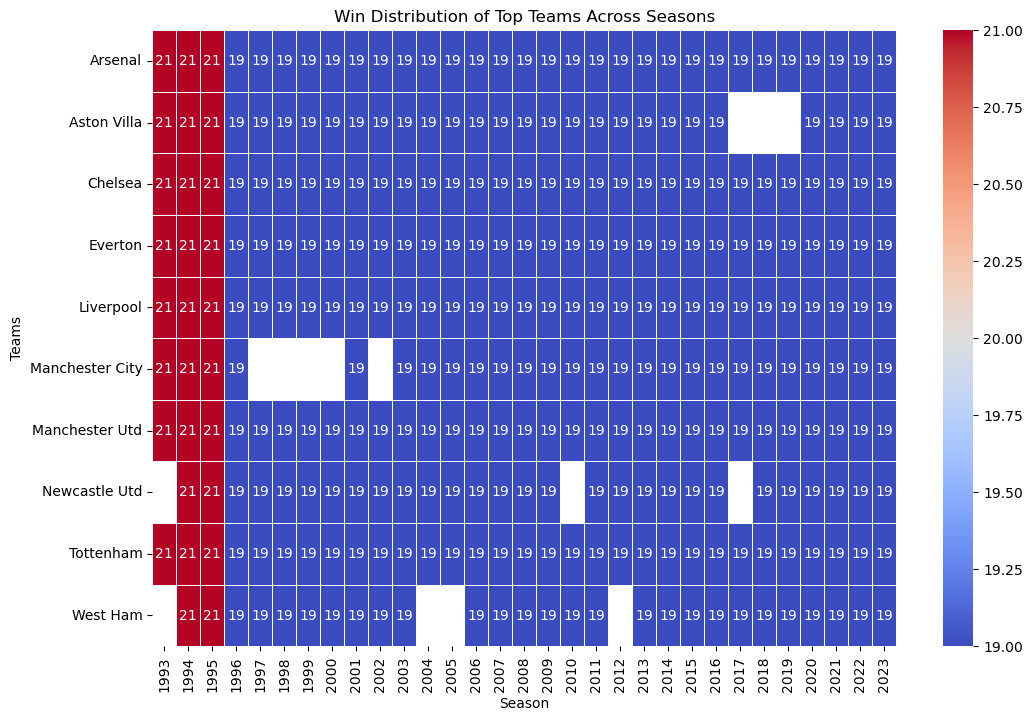

In [31]:
pivot_table = top_teams_season.pivot(index='Home', columns='Season_End_Year', values='total_wins')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Win Distribution of Top Teams Across Seasons')
plt.xlabel('Season')
plt.ylabel('Teams')
plt.show()


## Top 10 Teams Barplot

/var/folders/gv/0cnp_rxd5w17b9snllc_9tgw0000gn/T/ipykernel_1444/79218494.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




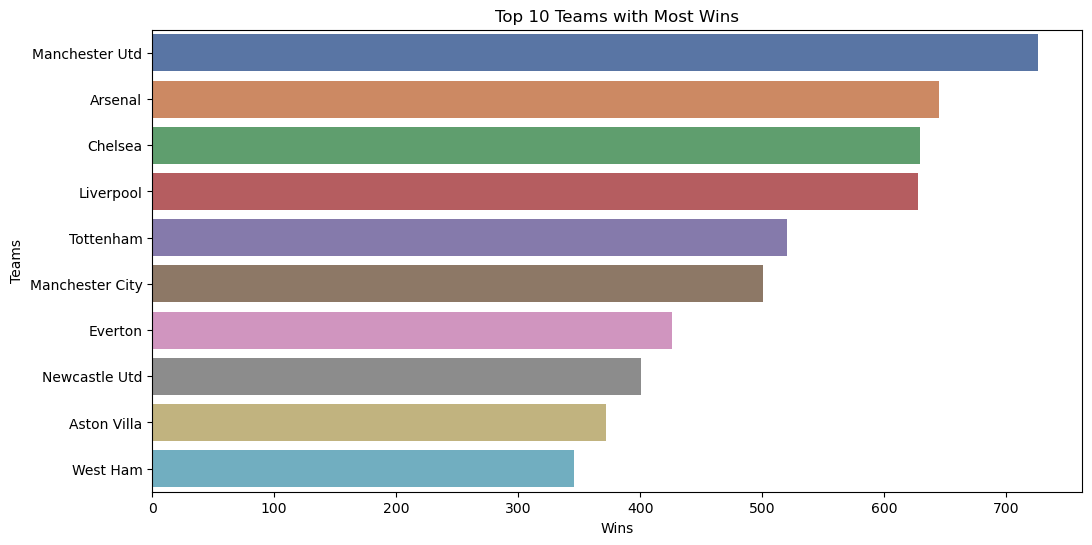

In [43]:
# Calculate wins for home and away teams
df['home_win'] = np.where(df['FTR'] == 'H', 1, 0)
df['away_win'] = np.where(df['FTR'] == 'A', 1, 0)

# Sum wins for home and away teams
home_wins = df.groupby('Home')['home_win'].sum().reset_index()
away_wins = df.groupby('Away')['away_win'].sum().reset_index()

# Merge home and away wins data
team_wins = pd.merge(home_wins, away_wins, left_on='Home', right_on='Away', suffixes=('_home', '_away'))
team_wins['total_wins'] = team_wins['home_win'] + team_wins['away_win']

# Get top 10 teams with most wins
top_teams = team_wins[['Home', 'total_wins']].sort_values(by='total_wins', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='total_wins', y='Home', data=top_teams, palette='deep')
plt.title('Top 10 Teams with Most Wins')
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.show()


## Distribution of Goals

/var/folders/gv/0cnp_rxd5w17b9snllc_9tgw0000gn/T/ipykernel_1444/1873434134.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




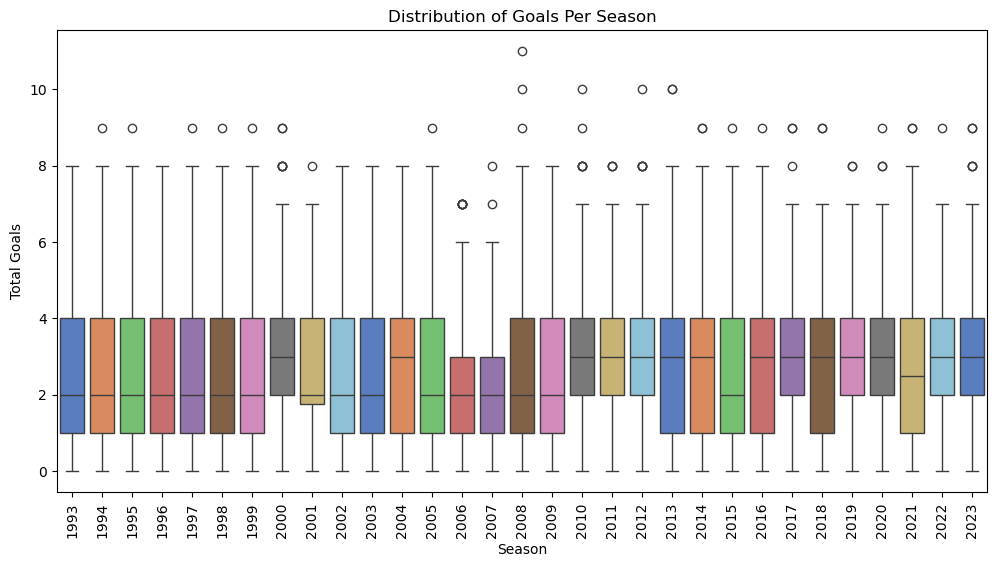

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season_End_Year', y='total_goals', data=df, palette='muted')
plt.title('Distribution of Goals Per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

## Average goals per match over the years

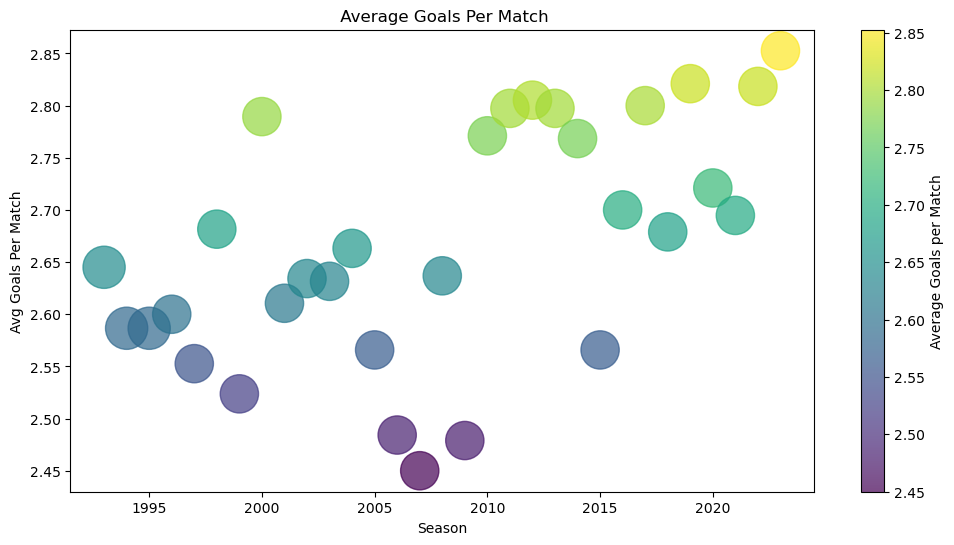

In [116]:
plt.figure(figsize=(12, 6))
plt.scatter(avg_goals_per_match['Season_End_Year'], avg_goals_per_match['avg_goals_per_match'], 
            s=avg_goals_per_match['Home'] * 2, c=avg_goals_per_match['avg_goals_per_match'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Average Goals per Match')
plt.title(' Average Goals Per Match')
plt.xlabel('Season')
plt.ylabel('Avg Goals Per Match')
plt.show()


## Home vs Away win rate

In [35]:
# Calculate total matches and wins at home and away
total_matches = df.groupby('Season_End_Year').size()
home_wins = df[df['HomeGoals'] > df['AwayGoals']].groupby('Season_End_Year').size()
away_wins = df[df['AwayGoals'] > df['HomeGoals']].groupby('Season_End_Year').size()

# Calculate win rates
win_rate_comparison = pd.DataFrame({
    'home_win': (home_wins / total_matches).fillna(0),
    'away_win': (away_wins / total_matches).fillna(0)
}).reset_index()


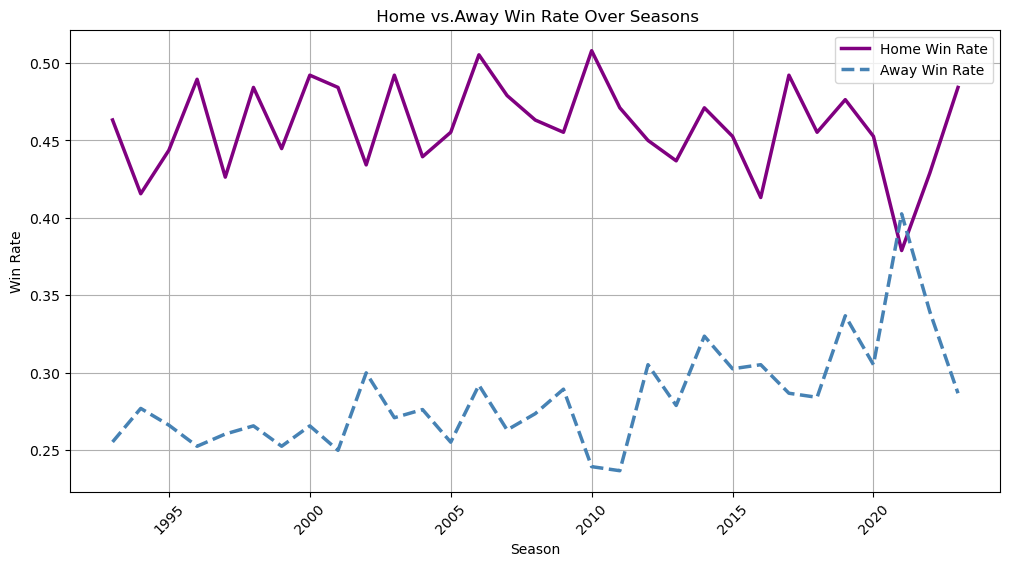

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season_End_Year', y='home_win', data=win_rate_comparison, label='Home Win Rate', color='purple', linewidth=2.5)
sns.lineplot(x='Season_End_Year', y='away_win', data=win_rate_comparison, label='Away Win Rate', color='steelblue', linestyle='dashed', linewidth=2.5)
plt.title(' Home vs.Away Win Rate Over Seasons')
plt.xlabel('Season')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [48]:
import plotly.express as px
fig = px.treemap(df, path=['Season_End_Year', 'Home'], values='HomeGoals', color='HomeGoals')
fig.update_layout(title='Home Goals by Teams Over Seasons')
fig.show()
